# About The DataSet


* hotel: Type of hotel(Resort hotel or City Hotel)

* is_canceled: Value indicating if the booking was canceled (1) or not (0)

* lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* arrival_date_year: Year of arrival date

* arrival_date_month: Month of arrival date

* arrival_date_week_number: Week number of year for arrival date

* arrival_date_day_of_month: Day of arrival date

* stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* adults: Number of adults

* children: Number of children

* babies: Number of babies


* meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

* country: Country of origin. Categories are represented in the ISO 3155–3:2013 format

* market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)

* previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking

* previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking

* reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

* agent: ID of the travel agency that made the booking

* company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer

* customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

* adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* required_car_parking_spaces: Number of car parking spaces required by the customer

* total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)

* reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

* reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

# Import Libiraries

In [1]:
# Import Libraries
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Loding dataset

In [2]:
# Load Dataset
df = pd.read_csv('Hotel Bookings.csv')

In [3]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [7]:
# Missing Values/Null Values Count

df.isnull().sum()[df.isnull().sum()>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

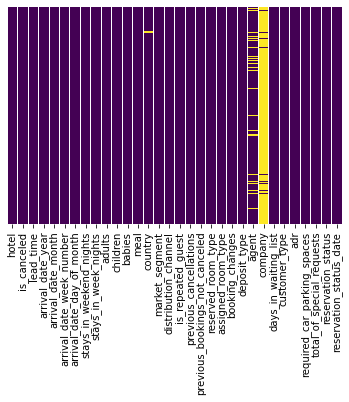

In [8]:
# Visualizing the missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [9]:
df.loc[df.agent.isnull()==False,'agent']='Agent'
df.agent.fillna('No agent',inplace=True)

In [10]:
df.country.fillna('Unknown',inplace=True)

In [11]:
df.children.fillna(0,inplace=True)

In [12]:
df.loc[((df.market_segment=='Corporate') | (df.distribution_channel=='Corporate')) & (df.company.isnull()),'company']='Corporate'

In [13]:
df.loc[df.company.isnull()==False,'company']='Corporate'

In [14]:
df.company.fillna('Individuals',inplace=True)

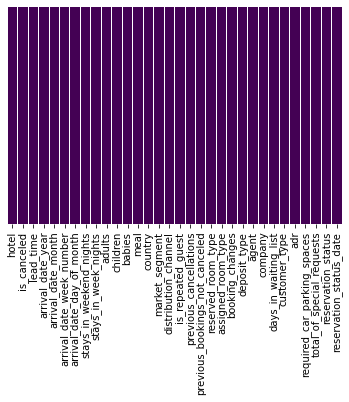

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [16]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

# Understanding Your Variables


In [17]:
# Dataset Columns
df.columns.value_counts()

hotel                             1
is_canceled                       1
reservation_status                1
total_of_special_requests         1
required_car_parking_spaces       1
adr                               1
customer_type                     1
days_in_waiting_list              1
company                           1
agent                             1
deposit_type                      1
booking_changes                   1
assigned_room_type                1
reserved_room_type                1
previous_bookings_not_canceled    1
previous_cancellations            1
is_repeated_guest                 1
distribution_channel              1
market_segment                    1
country                           1
meal                              1
babies                            1
children                          1
adults                            1
stays_in_week_nights              1
stays_in_weekend_nights           1
arrival_date_day_of_month         1
arrival_date_week_number    

In [18]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [19]:
# Check Unique Values for each variable.

In [47]:
for cols in df:
  print(cols)
  print(pd.Series(df[cols]))
  print('\n','\n')



hotel
0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object

 

is_canceled
0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64

 

lead_time
0         342
1         737
2           7
3          13
4          14
         ... 
119385     23
119386    102
119387     34
119388    109
119389    205
Name: lead_time, Length: 119390, dtype: int64

 

arrival_date_year
0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
119385    2017
119386    2017
119387    2017
119388    2017
119389    2017
Name: arrival_date_year, Length: 119390, dtype: int64

 

arrival_date_month
0           July
1      

# Data Wrangling

In [21]:
# Write your code to make your dataset analysis ready.
europe=['PRT','GBR','ESP','IRL','FRA','ROU','NOR','POL','DEU','BEL','CHE','GRC','ITA','NLD','DNK','RUS','SWE','EST',
       'CZE','FIN','LUX','SVN','ALB','UKR','SMR','LVA','SRB','AUT','BLR','LTU','TUR','HUN','HRV','GEO','AND','SVK',
       'MKD','BIH','BGR','MLT','ISL','MCO','LIE','MNE']

north_a=['USA','MEX','PRI','CRI','CUB','HND','NIC','GAB','PAN','SLV','GTM']

south_a=['ARG','BRA','CHL','URY','COL','VEN','SUR','PER','ECU','BOL','PRY','GUY']

asia=['OMN','CN','IND','CHN','ISR','KOR','ARE','HKG','IRN','CYP','KWT','MDV','KAZ','PAK','IDN','LBN','PHL','AZE','BHR',
     'THA','MYS','ARM','JPN','LKA','JOR','SYR','SGP','SAU','VNM','QAT','UZB','NPL','MAC','TWN','IRQ','KHM','BGD','TJK',
     'TMP','MMR','LAO']

africa=['MOZ','BWA','MAR','ZAF','AGO','ZMB','ZWE','DZA','TUN','CAF','NGA','SEN','SYC','CMR','MUS','COM','UGA','CIV',
       'BDI','EGY','MWI','MDG','TGO','DJI','STP','ETH','RWA','BEN','TZA','GHA','KEN','GNB','BFA','LBY','MLI','NAM',
       'MRT','SDN','SLE']

australia=['AUS']

Others=['CYM','CPV','JAM','GIB','JEY','GGY','FJI','NZL','DOM','PLW','BHS','KNA','IMN','VGB','GLP','UMI','MYT','FRO',
       'BRB','ABW','AIA','DMA','PYF','LCA','ATA','ASM','NCL','KIR','ATF']

unk=['Unknown']

In [22]:
def country_bin(x):
    if x in europe:
        return 'Europe'
    elif x in north_a:
        return 'North America'
    elif x in south_a:
        return 'South America'
    elif x in asia:
        return 'Asia'
    elif x in africa:
        return 'Africa'
    elif x in australia:
        return 'Australia'
    elif x in Others:
        return 'Others'
    elif x in unk:
        return 'Unknown'
df.country=df.country.apply(country_bin)

In [23]:
df['country'].value_counts()

Europe           108060
Asia               4201
South America      2708
North America      2242
Africa             1083
Unknown             488
Australia           426
Others              182
Name: country, dtype: int64

In [24]:
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes(['float64','int64'])

In [25]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   hotel                    119390 non-null  object
 1   arrival_date_month       119390 non-null  object
 2   meal                     119390 non-null  object
 3   country                  119390 non-null  object
 4   market_segment           119390 non-null  object
 5   distribution_channel     119390 non-null  object
 6   reserved_room_type       119390 non-null  object
 7   assigned_room_type       119390 non-null  object
 8   deposit_type             119390 non-null  object
 9   agent                    119390 non-null  object
 10  company                  119390 non-null  object
 11  customer_type            119390 non-null  object
 12  reservation_status       119390 non-null  object
 13  reservation_status_date  119390 non-null  object
dtypes: object(14)
memory

In [26]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_week_number        119390 non-null  int64  
 4   arrival_date_day_of_month       119390 non-null  int64  
 5   stays_in_weekend_nights         119390 non-null  int64  
 6   stays_in_week_nights            119390 non-null  int64  
 7   adults                          119390 non-null  int64  
 8   children                        119390 non-null  float64
 9   babies                          119390 non-null  int64  
 10  is_repeated_guest               119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

is_canceled
0.5366716466173548


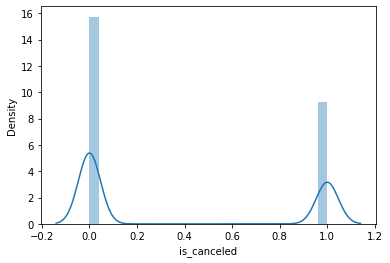

lead_time
1.3465329547937892


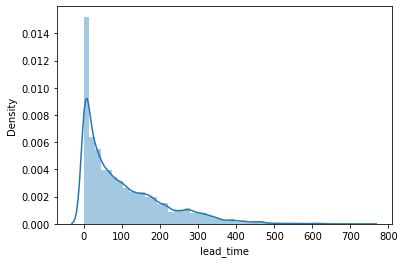

arrival_date_year
-0.23258032965769215


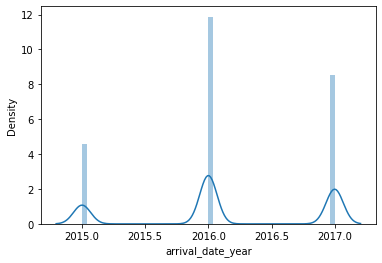

arrival_date_week_number
-0.010014200222448031


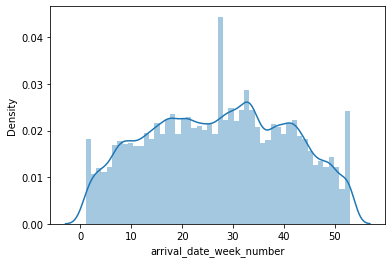

arrival_date_day_of_month
-0.002000428845090873


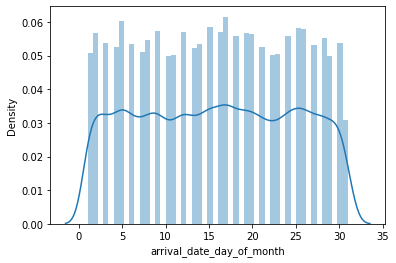

stays_in_weekend_nights
1.3800291109266631


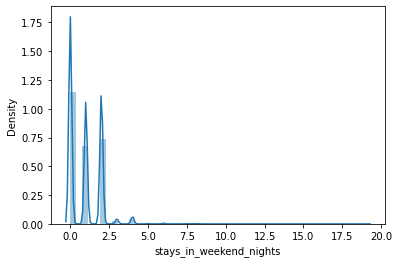

stays_in_week_nights
2.8622132810247685


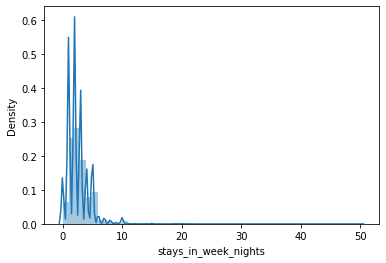

adults
18.31757461595262


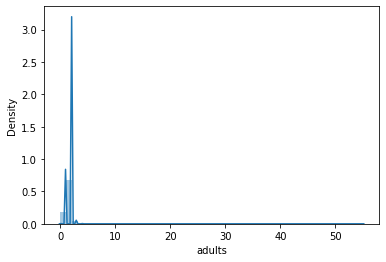

children
4.112618328160294


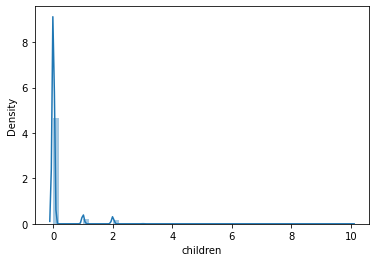

babies
24.64623517268788


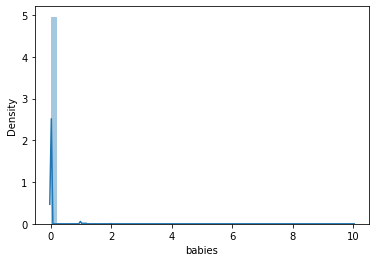

is_repeated_guest
5.326248415714708


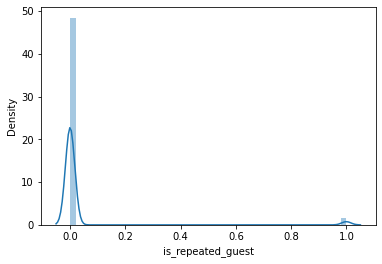

previous_cancellations
24.457741434392233


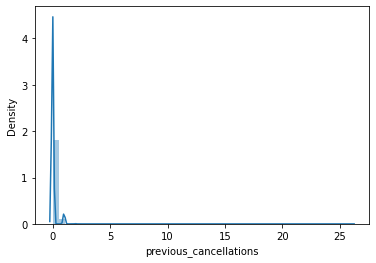

previous_bookings_not_canceled
23.539504200911477


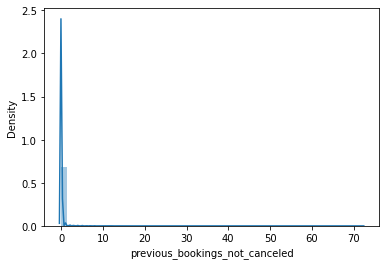

booking_changes
6.000194667555373


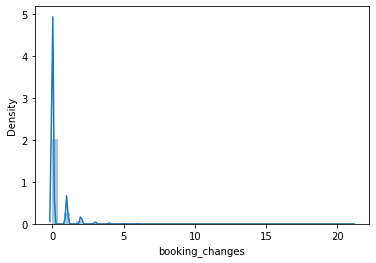

days_in_waiting_list
11.94420337865468


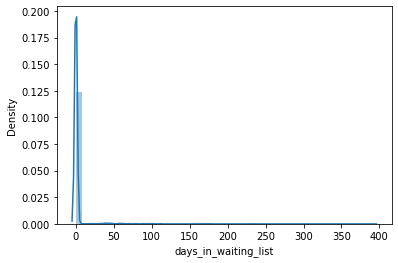

adr
10.530081681526998


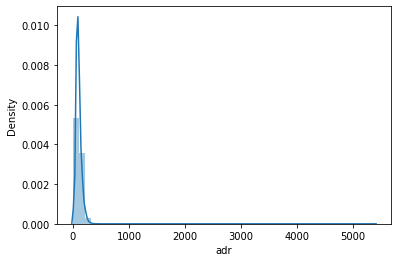

required_car_parking_spaces
4.163180931385679


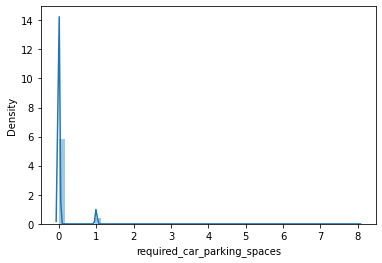

total_of_special_requests
1.349172426328122


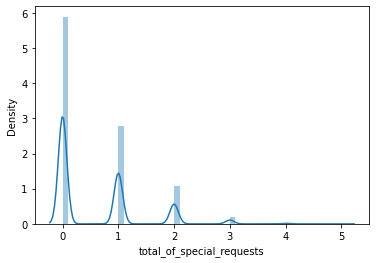

In [27]:
# Chart - 1 visualization code
from scipy.stats import skew
for col in df_num:
  print(col)
  print(skew(df[col]))

  plt.figure()
  sns.distplot(df_num[col])
  plt.show()

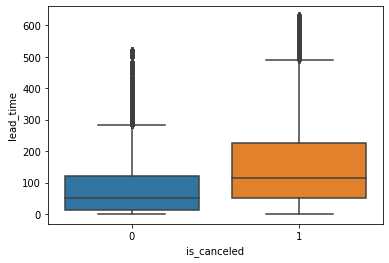

In [28]:
# Chart - 2 visualization code

sns.boxplot(x='is_canceled',y='lead_time',data=df.loc[df.hotel=='City Hotel'])
plt.show()

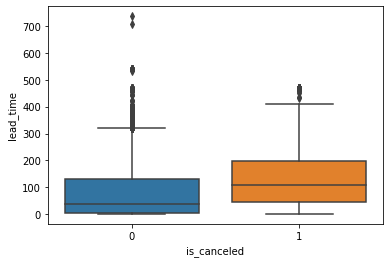

In [29]:
sns.boxplot(x='is_canceled',y='lead_time',data=df.loc[df.hotel=='Resort Hotel'])
plt.show()

Text(0, 0.5, 'Number of Bookings')

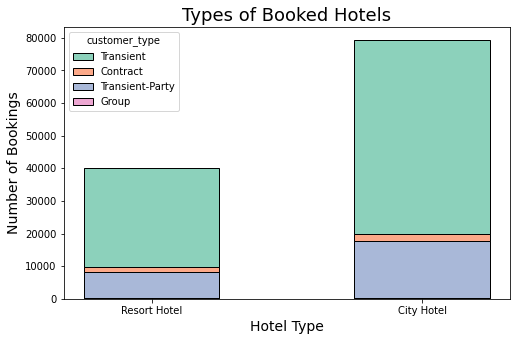

In [30]:
# Chart - 3 visualization code
plt.subplots(figsize = (8,5))
sns.histplot(data = df, x = "hotel",palette = "Set2", hue = "customer_type", multiple = "stack", shrink = 0.5)
plt.title("Types of Booked Hotels", fontsize = 18)
plt.xlabel("Hotel Type", fontsize = 14)
plt.ylabel("Number of Bookings", fontsize = 14)

[Text(0, 0, 'Yes'), Text(0, 0, 'No')]

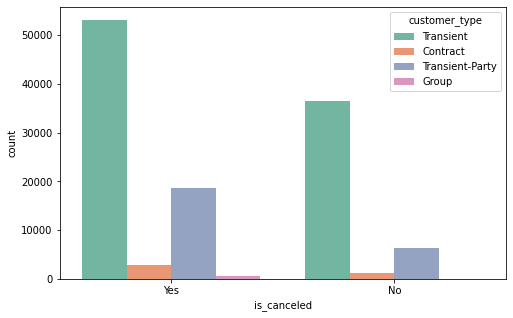

In [31]:
plt.subplots(figsize = (8,5))
a = sns.countplot(data = df, x = "is_canceled", hue = "customer_type", palette = "Set2")
a.set_xticklabels(["Yes","No"])

[Text(0, 0, 'C'),
 Text(0, 0, 'A'),
 Text(0, 0, 'D'),
 Text(0, 0, 'E'),
 Text(0, 0, 'G'),
 Text(0, 0, 'F'),
 Text(0, 0, 'H'),
 Text(0, 0, 'L'),
 Text(0, 0, 'P'),
 Text(0, 0, 'B')]

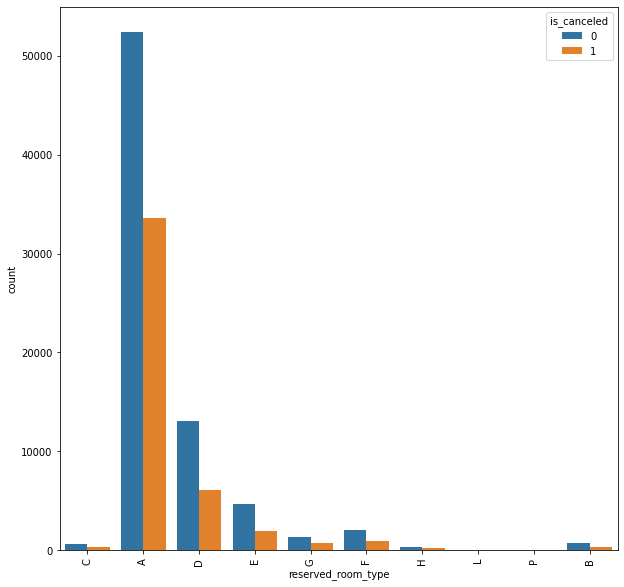

In [32]:
# Chart - 4 visualization code

plt.figure(figsize=(10,10))
yr = sns.countplot(data=df,x='reserved_room_type',hue = "is_canceled")
yr.set_xticklabels(yr.get_xticklabels(),rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

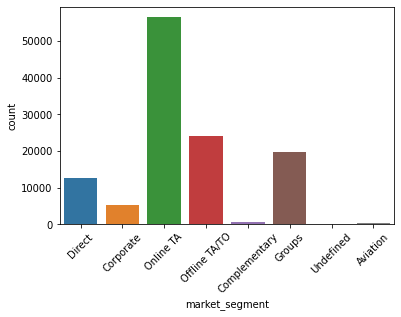

In [33]:
# Chart - 5 visualization code
sns.countplot(df['market_segment'])
plt.xticks(rotation = 45)

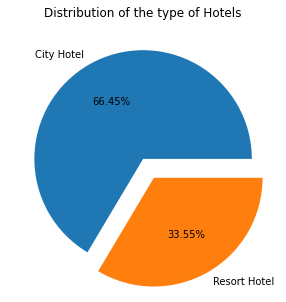

In [34]:
# Chart - 6 visualization code
plt.rcParams['figure.figsize']=[5,5]
plt.pie(df.hotel.value_counts().values,explode=[0,0.2],labels=df.hotel.value_counts().index,autopct='%.2f%%')
plt.title('Distribution of the type of Hotels')
plt.show()

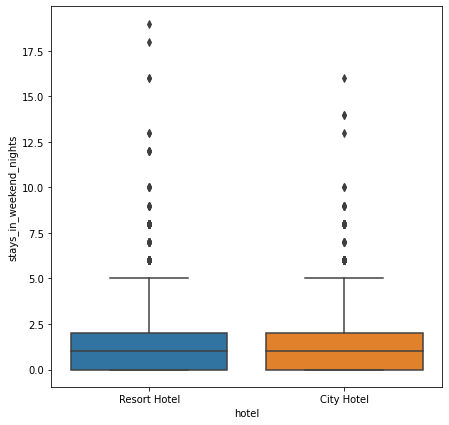

In [36]:
# Chart - 7 visualization code
plt.figure(figsize=(7,7))
sns.boxplot(x='hotel',y='stays_in_weekend_nights',data=df)
plt.show()

Text(0.5, 0, 'Type of Customer')

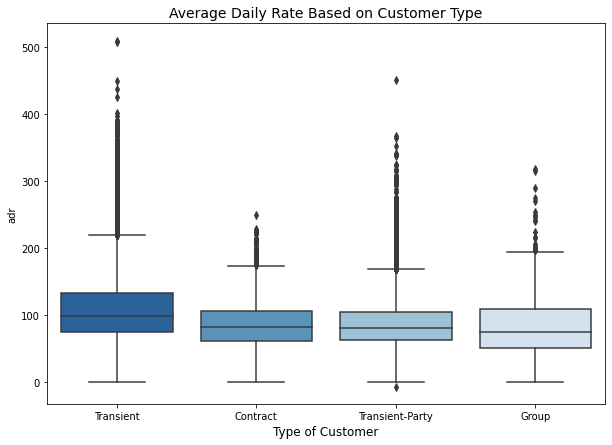

In [35]:
# Chart - 8 visualization code

fig = plt.subplots(figsize = (10,7))
c= sns.boxplot(data = df[df["adr"]<1000], x = "customer_type", y = "adr", palette = "Blues_r")
c.set_title("Average Daily Rate Based on Customer Type", fontsize = 14)
c.set_xlabel("Type of Customer", fontsize = 12)

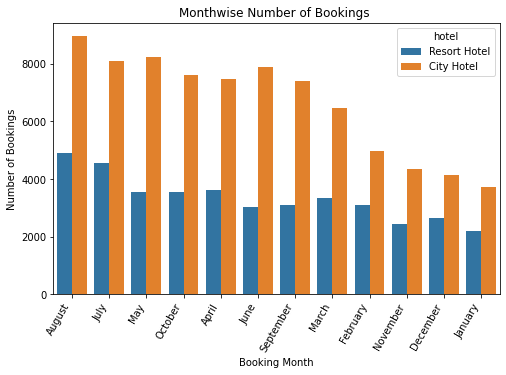

In [37]:
# Chart - 9 visualization code

plt.rcParams['figure.figsize']=[8,5]
sns.countplot(x='arrival_date_month',data=df,order=df.arrival_date_month.value_counts().index,hue='hotel')
plt.title('Monthwise Number of Bookings ')
plt.xlabel('Booking Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=60,ha='right')
plt.show()


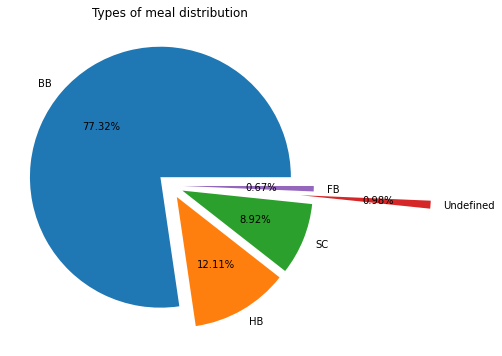

In [39]:
# Chart - 10 visualization code

plt.figure(figsize=(8,6))
plt.pie(df.meal.value_counts().values,explode=[0.1,0.1,0.1,1,0.1],labels=df.meal.value_counts().index,autopct='%.2f%%')
plt.title('Types of meal distribution')
plt.show()

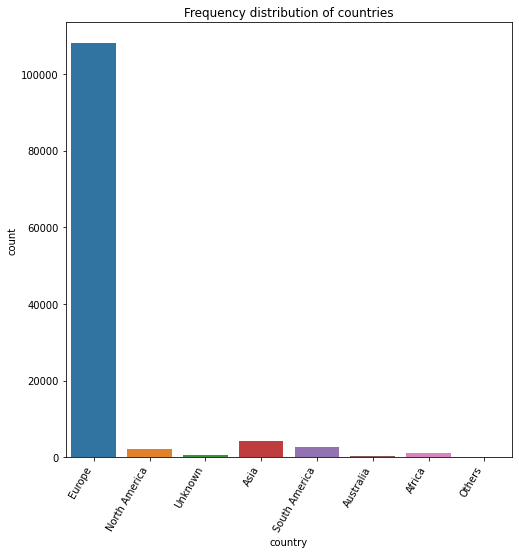

In [40]:
# Chart - 11 visualization code
plt.figure(figsize=(8,8))
sns.countplot(x='country',data=df)
plt.title('Frequency distribution of countries')
plt.xticks(rotation=60,ha='right')
plt.show()

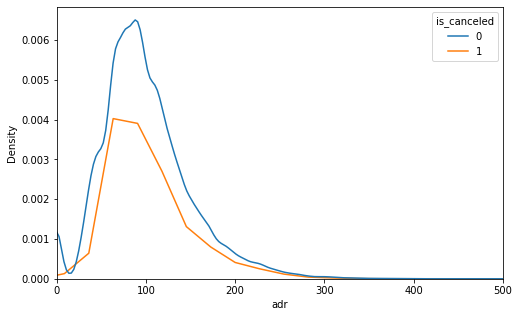

In [41]:
# Chart - 12 visualization code
plt.xlim(0, 500)
sns.kdeplot(data = df, x = 'adr', label = 'Not Canceled', hue = 'is_canceled')

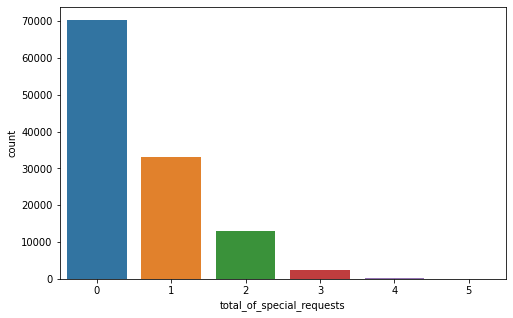

In [42]:
# Chart - 13 visualization code

sns.countplot(x='total_of_special_requests',data=df)
plt.show()

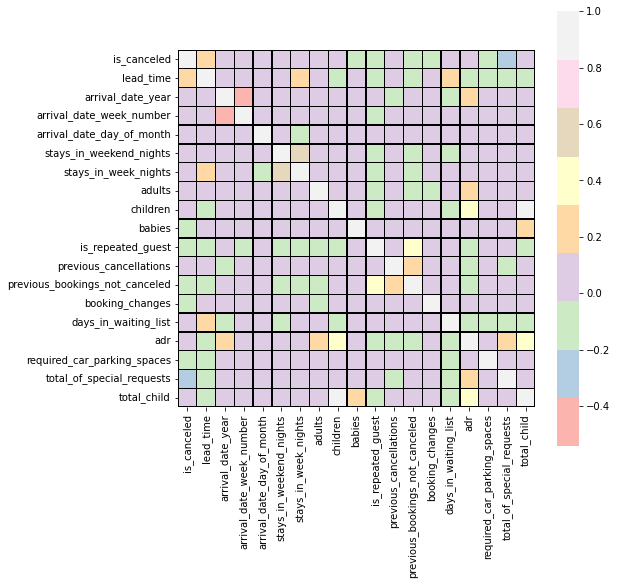

In [44]:
# Correlation Heatmap visualization code

fig = plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), linecolor = 'black', linewidths = 0.5,cmap=sns.color_palette('Pastel1'),square=True)

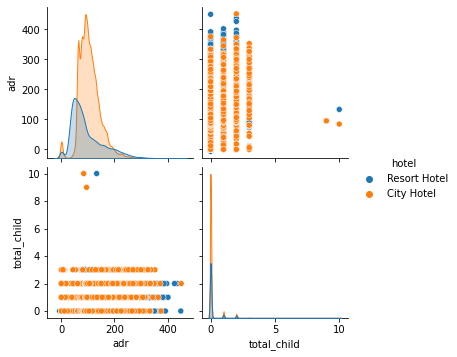

In [43]:
# Pair Plot visualization code
df['total_child'] = df['children'] + df['babies'] 
sns.pairplot(data = df[df['adr']<500][['hotel', 'agent', 'adr', 'total_child']], hue ='hotel')